# [**Sélection conjointe de caractéristiques avec le lasso multi-tâche**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_1_linear_model/plot_multi_task_lasso_support.ipynb)<br/>([_Joint feature selection with multi-task Lasso_](https://scikit-learn.org/stable/auto_examples/linear_model/plot_multi_task_lasso_support.html))

Le lasso multi-tâche permet d'ajuster simultanément plusieurs problèmes de régression en imposant que les caractéristiques sélectionnées soient les mêmes pour toutes les tâches. Cet exemple simule des mesures séquentielles, chaque tâche étant un instant temporel, et les caractéristiques pertinentes varient en amplitude au fil du temps tout en restant les mêmes. Le lasso multi-tâche impose que les caractéristiques sélectionnées à un instant donné soient sélectionnées pour tous les instants. Cela rend plus stable la sélection de caractéristiques par le lasso.

In [1]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

# Générer les données

In [3]:
import numpy as np

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

# Ajuster les modèles

In [4]:
from sklearn.linear_model import Lasso, MultiTaskLasso

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_

# Tracer le support et les séries temporelles

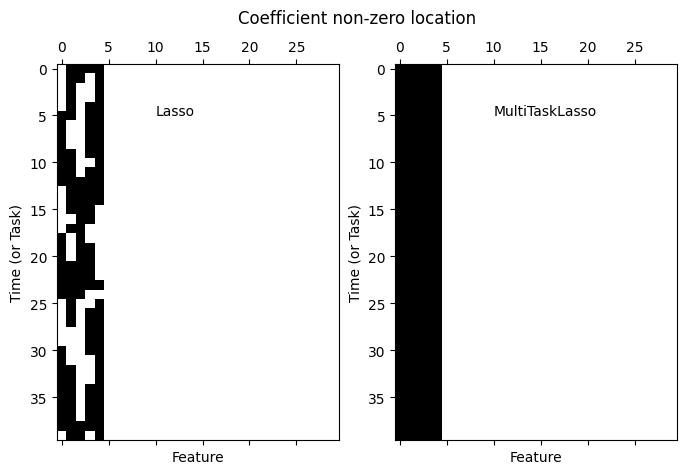

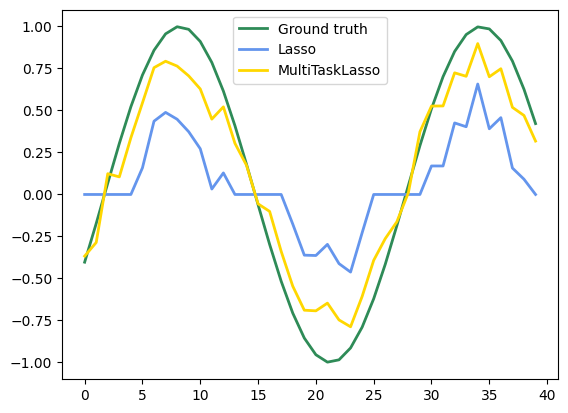

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="Ground truth")
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()